In [1]:
%config InlineBackend.figure_format='retina'

# for analysis
import pandas as pd
import numpy as np
import scipy

#for plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#import seaborn as sns; sns.set(font_scale=3)
np.set_printoptions(suppress=True, threshold=np.nan)
fig, ax = plt.subplots()
plt.subplots(figsize=(20, 10))

BIGGER_SIZE = 26

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%matplotlib inline

In [2]:
#import synestia particle attribute data
#this data is static, and after extra radiation cooling has been added post simulation

particles = pd.read_csv('./synestia_particle_data.csv') #make sure the path-to-file is correct
particles.head() #confirm the data looks correct, akin to the "Geometry Spreadsheet" tab in Houdini

,id,pressure,temperature,density,P[X],P[Y],P[Z],vel[X],vel[Y],vel[Z],mass,entropy,smoothLen,potential
0,1,225.657486,7361.239746,12.123034,-1.035675,1.451132,-0.113785,-3.700542,-2.632296,0.058064,5.920000e+22,17429698,0.488643,-1.000000e+12
1,2,250.719452,6967.509277,12.465510,-0.587094,0.996217,-0.057019,-2.539360,-1.497492,0.003513,5.920000e+22,17042952,0.487478,-1.030000e+12
2,3,227.593506,6996.430176,12.177461,-0.987687,1.308719,0.388076,-3.347536,-2.529887,0.017951,5.920000e+22,17179808,0.487963,-1.000000e+12
3,4,252.776413,6860.425781,12.498366,-0.053954,1.197015,0.250453,-3.047109,-0.119876,0.055459,5.920000e+22,16965152,0.487663,-1.020000e+12
4,5,245.270584,7354.320313,12.370044,-0.504045,1.371142,0.366814,-3.539281,-1.287469,-0.008884,5.920000e+22,17318536,0.487871,-1.010000e+12


In [3]:
#Smoothing length threshold
hsml_upbound = particles[particles["smoothLen"] <= 90]

#Density threshold
particles_bounded = hsml_upbound[hsml_upbound["density"] <= 3.4] #max inside core (from shader)
print(particles_bounded)

               id   pressure   temperature   density       P[X]       P[Y]  \
36671   200000000   0.998479   7480.469238  0.642256  -0.472065  -8.650381   
36672   200000000  12.245077   8193.594727  3.101000  -3.811483  -5.744662   
36673   200000000   2.205342   8865.547852  0.980643  -3.705107  -2.498674   
36674   200000000   9.998915   8511.694336  2.984475   2.475773  -6.797088   
36675   200000000   4.861516   8811.471680  2.597961  -6.288623   0.374799   
36676   200000000   7.609941   8405.995117  2.879080  -5.165038  -5.097959   
36677   200000016   0.352076   6808.496094  0.228650   8.047278   5.478495   
36678   200000016   3.907097   8763.194336  2.482572   0.984196   6.970543   
36679   200000016   0.036041   6461.284668  0.019096 -10.037862   9.104488   
36681   200000016   0.842821   7677.710449  0.454823   7.492118  -2.812991   
36682   200000016  16.995773   7166.801758  3.303640   1.967836  -6.002256   
36684   200000016   2.988850   9100.246094  1.827929   5.402254 

In [4]:
temp_and_pressure = particles_bounded.drop(['id', 'density', 'P[X]', 'P[Y]', 'P[Z]', 'vel[X]', 'vel[Y]', 'vel[Z]', 
                                            'mass', 'entropy', 'smoothLen', 'potential'], axis=1)
temp_and_density = particles_bounded.drop(['id', 'pressure', 'P[X]', 'P[Y]', 'P[Z]', 'vel[X]', 'vel[Y]', 'vel[Z]', 
                                            'mass', 'entropy', 'smoothLen', 'potential'], axis=1)
temp_and_ent = particles_bounded.drop(['id', 'pressure', 'P[X]', 'P[Y]', 'P[Z]', 'vel[X]', 'vel[Y]', 'vel[Z]', 
                                            'mass', 'density', 'smoothLen', 'potential'], axis=1)
pressure_and_ent = particles_bounded.drop(['id', 'density', 'temperature', 'P[X]', 'P[Y]', 'P[Z]', 'vel[X]', 'vel[Y]', 'vel[Z]', 
                                            'mass', 'smoothLen', 'potential'], axis=1)
temp_and_ent.head()

,temperature,entropy
36671,7480.469238,58827208
36672,8193.594727,48131536
36673,8865.547852,58265784
36674,8511.694336,48869084
36675,8811.471680,50395076


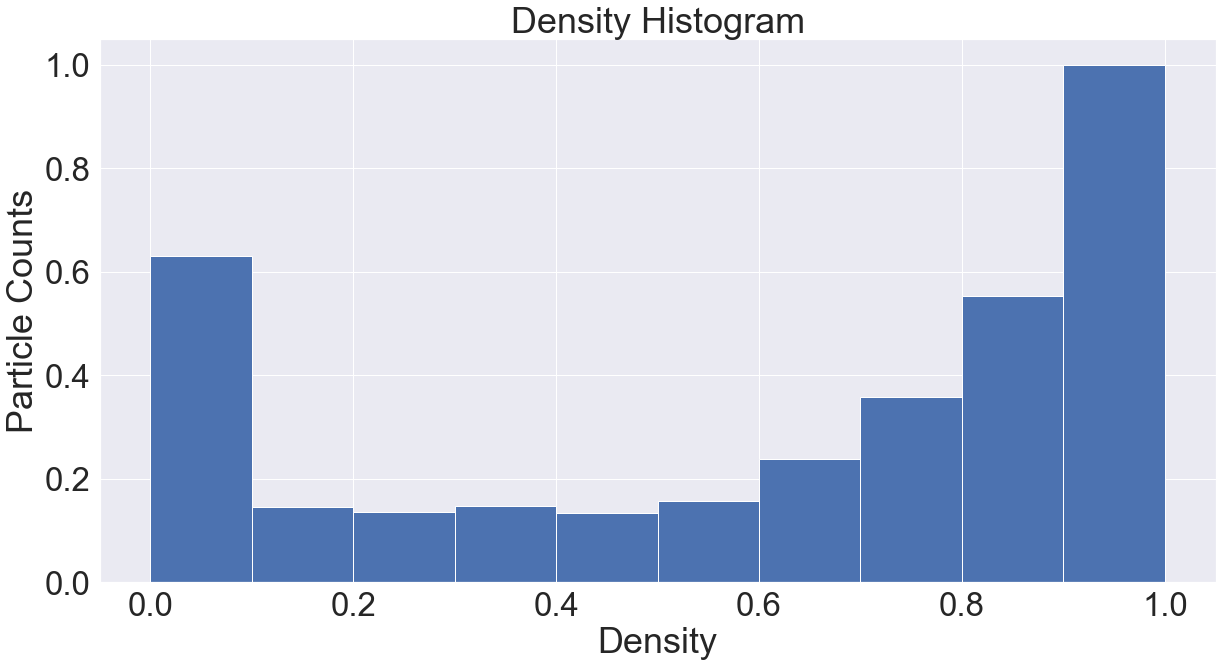

In [9]:
plt.subplots(figsize=(20, 10))
#print(plt.hist(particles_bounded["density"])[0])
weights = np.ones_like(particles_bounded["density"])/10284
plt.hist(particles_bounded["density"]/max(particles_bounded["density"]), weights=weights)
#print(len(particles_bounded["density"]))
plt.xlabel("Density")
plt.ylabel("Particle Counts")
plt.title('Density Histogram')
plt.show()

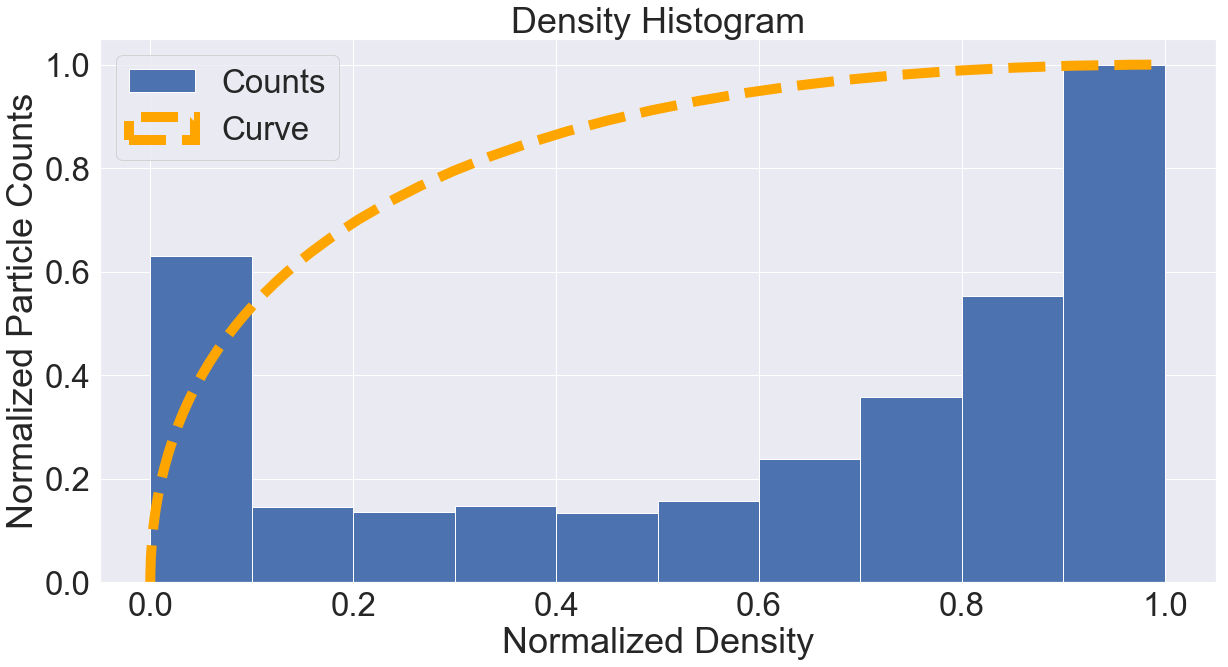

In [44]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

Path = mpath.Path

fig, ax = plt.subplots(figsize=(20, 10))
pp1 = mpatches.PathPatch(
    Path([(0, 0), (0, 1), (1, 1)],
         [Path.MOVETO, Path.CURVE3, Path.CURVE3]),
    ec="orange", fc='none', color='black', lw=10, ls='--', transform=ax.transData, label='Curve')
#plt.hist(particles_bounded["density"]/max(particles_bounded["density"]))[0]
weights = np.ones_like(particles_bounded["density"])/10284
plt.hist(particles_bounded["density"]/max(particles_bounded["density"]), weights=weights, label='Counts')
#plt.hist(particles_bounded["density"], weights=weights, label='Counts')
ax.add_patch(pp1)
#ax.plot([0.75], [0.25], "ro")
ax.set_title('Density Histogram')
ax.set_xlabel('Normalized Density')
ax.set_ylabel('Normalized Particle Counts')
ax.legend()

plt.show()

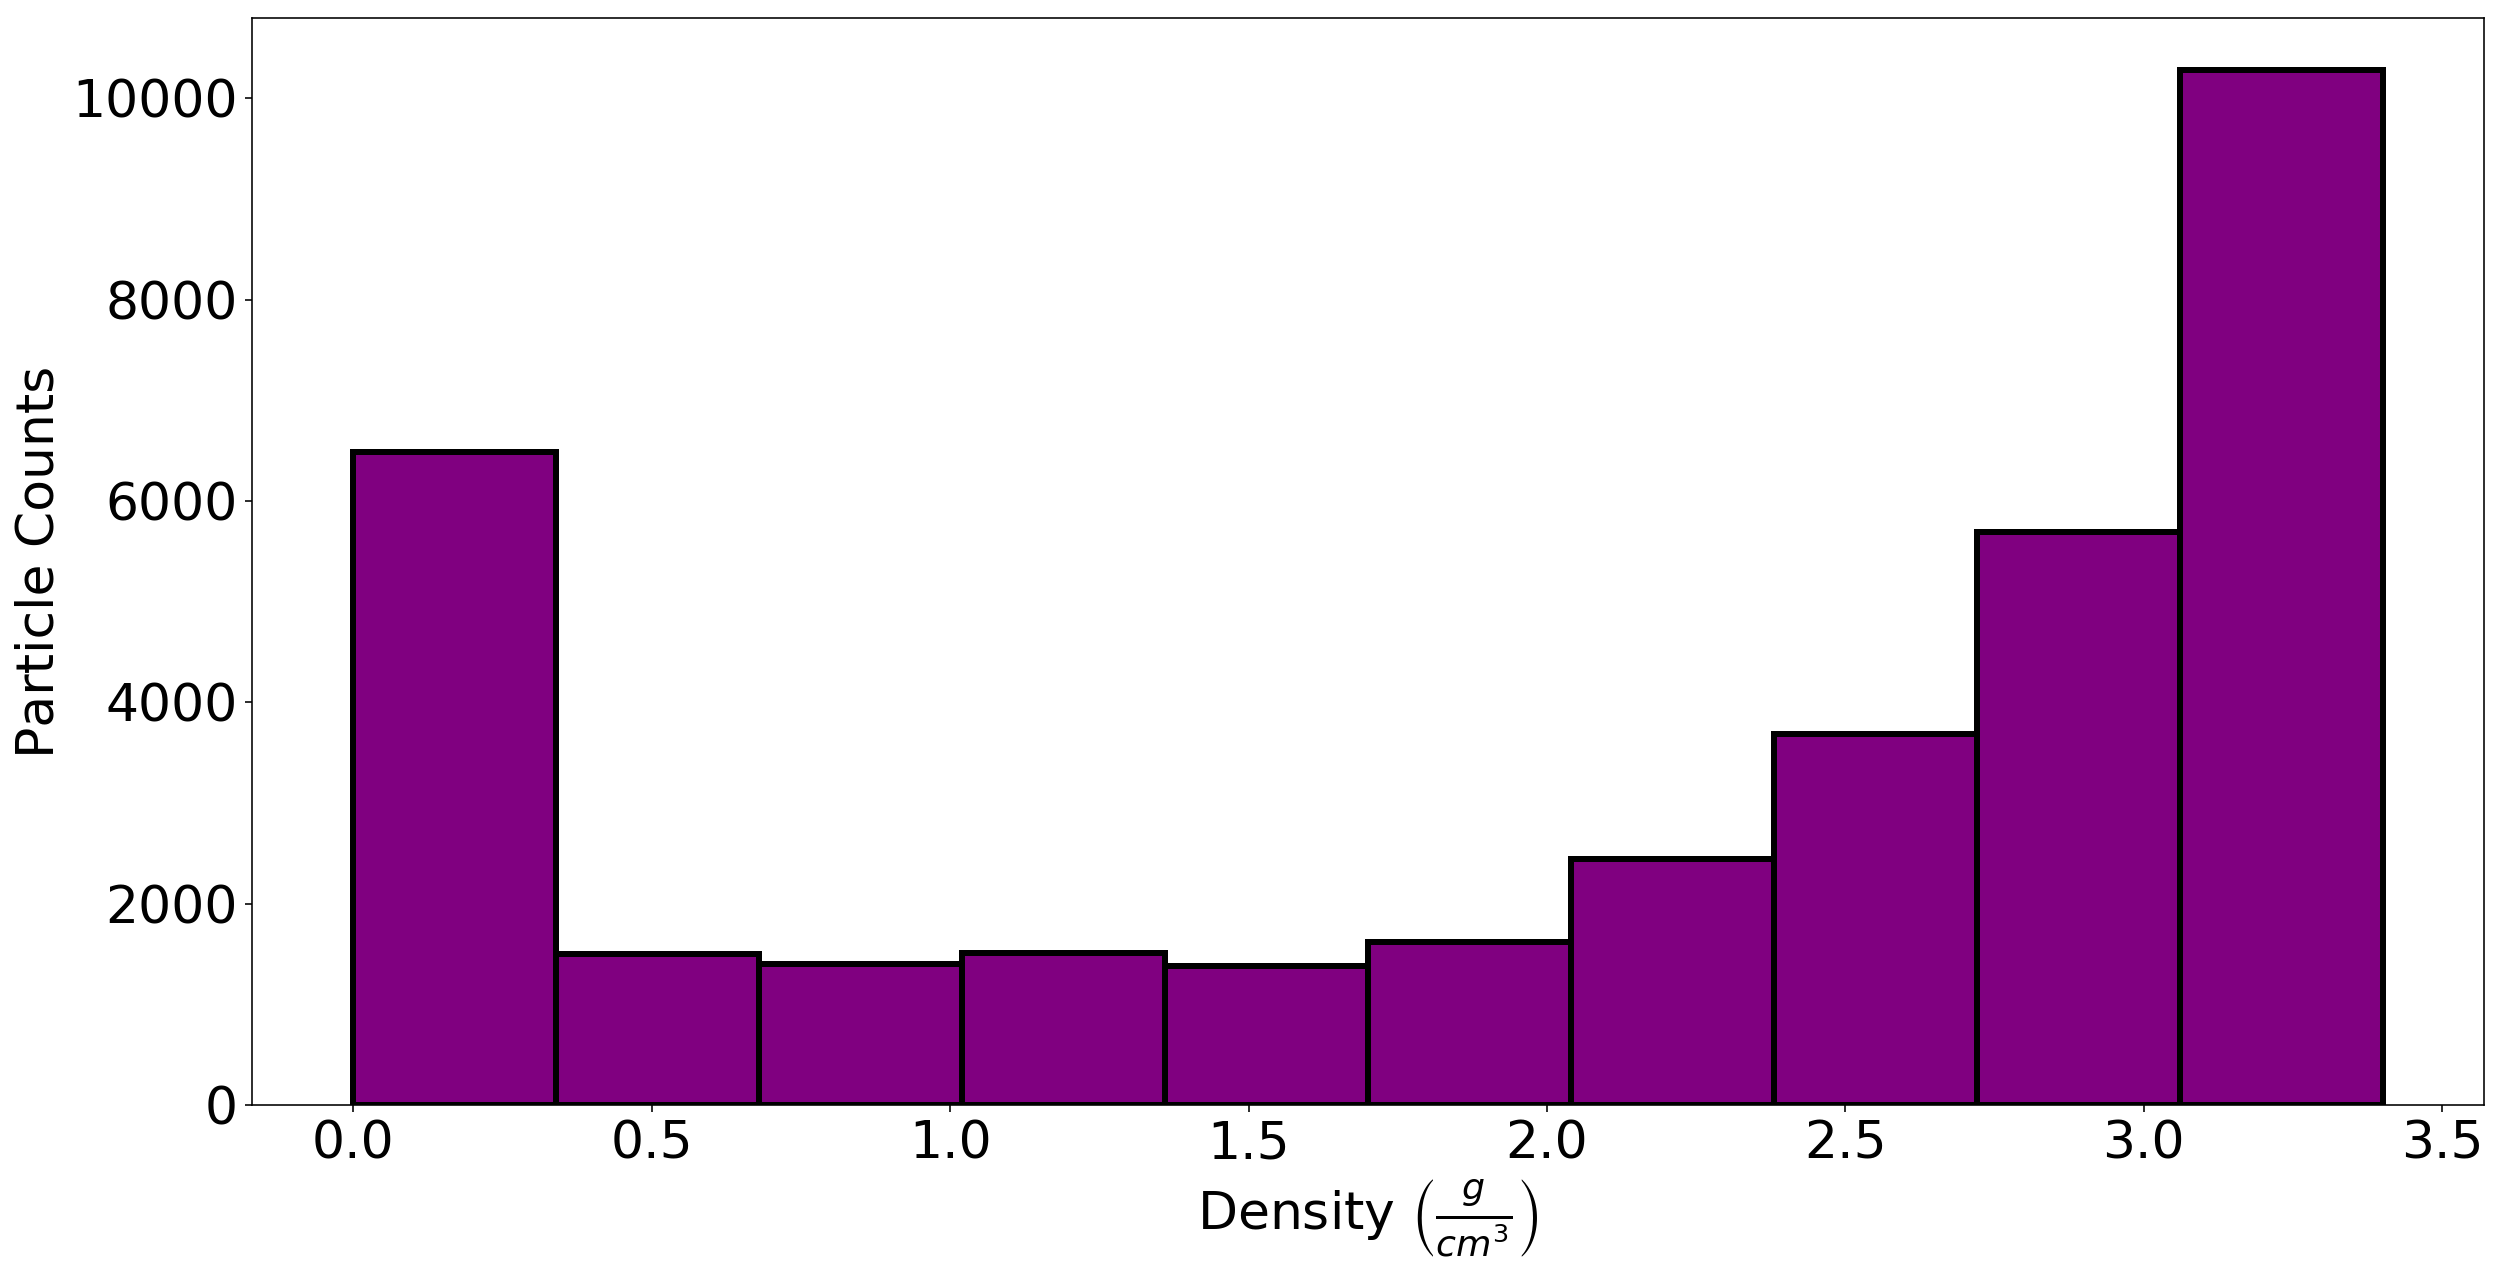

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))

#weights = np.ones_like(particles_bounded["density"])/10284
plt.hist(particles_bounded["density"], label='Counts', facecolor="purple", lw=3, edgecolor='black')
#ax.set_title('Density Histogram')
ax.set_xlabel(r'Density $\left(\frac{g}{cm^3}\right)$', fontsize=26)
ax.set_ylabel('Particle Counts', fontsize=26);

#Save fig!
plt.savefig('rho_histogram.jpg', format='jpg', dpi=300, bbox_inches='tight')